In [75]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib

# custom imports
from regression_class import RedditRegression as RR
from regression_class import TimestampClass

In [2]:
# the other 26 file (.py) must be run to run all required regressions

# infiles
regression_infile = "regression_thread_data.p"
thread_infile = 'clean_5_thread_data.p'

# outfiles
outdir = 'logistic_regression/logregs_26102023'
metrics_outfile = "regression_metrics"

# infile parent dir
indir = 'logistic_regression/logregs_26102023'

In [3]:
# get infile dirs
infile_dirs = [x for x in os.listdir(indir) if os.path.isdir(f"{indir}/{x}")]

In [106]:
infile.split('_')[-1].strip('.p')

'1'

In [4]:
# read in file to practice for script

infile_dir = infile_dirs[0]
indir_path = f"{indir}/{infile_dir}"
activity_threshold = int(infile_dir[-1])
infiles = os.listdir(indir_path)
infile =infiles[0]
collection_window_size = int(infile[-3])
regression_infile = pickle.load(open(f"{indir_path}/{infile}", 'rb'))

In [6]:
regression_infile.keys()

dict_keys(['logregs', 'regression_params', 'out_params'])

In [7]:
subreddit_logregs = regression_infile['logregs']
regression_params = regression_infile['regression_params']
out_params = regression_infile['out_params']

In [10]:
for subreddit in subreddit_logregs:
    subreddit_logregs[subreddit].regression_metrics = (
        subreddit_logregs[subreddit].regression_metrics[1]
    )

In [55]:
def nice_format_xticks(x_vals):
    
    separated_out = [x.split('_') for x in x_vals]
    xstrings = []
    for i in separated_out:
        if len(i) == 1:
            xstrings.append(i[0])
        elif len(i) == 2:
            xstrings.append(f'{i[0]}\n{i[1]}')
        else:
            divider = int(len(i)/2)-1
            xstring = ""
            for j in i:
                xstring += j
                if j == i[divider]:
                    xstring += '\n'
                elif j != j[-1]:
                    xstring += ' '
            xstrings.append(xstring)
    return xstrings


In [90]:
tester = []
for i in subreddit_logregs['books'].regression_metrics['metrics'].model.apply(
    subreddit_logregs['books'].get_x_vals_from_modstring):
    tester.append(i)

In [100]:
tester

[['sentiment_magnitude'],
 ['sentiment_magnitude', 'activity_ratio'],
 ['sentiment_magnitude', 'hour', 'activity_ratio'],
 ['sentiment_magnitude',
  'hour',
  'activity_ratio',
  'log_author_all_activity_count'],
 ['sentiment_magnitude',
  'hour',
  'activity_ratio',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count'],
 ['sentiment_sign',
  'sentiment_magnitude',
  'hour',
  'activity_ratio',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count'],
 ['sentiment_sign',
  'sentiment_magnitude',
  'hour',
  'num_dayofweek',
  'activity_ratio',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count'],
 ['sentiment_sign',
  'sentiment_magnitude',
  'hour',
  'num_dayofweek',
  'activity_ratio',
  'mean_author_sentiment_sign',
  'mean_author_sentiment_magnitude',
  'log_author_all_activity_count']]

In [98]:
proper_order = []
for i in tester:
    for j in i:
        if j not in proper_order:
            proper_order.append(j)

In [99]:
proper_order

['sentiment_magnitude',
 'activity_ratio',
 'hour',
 'log_author_all_activity_count',
 'mean_author_sentiment_magnitude',
 'sentiment_sign',
 'num_dayofweek',
 'mean_author_sentiment_sign']

In [ ]:
x_vals = nice_format_xticks(subreddit_logregs['books'].regression_metrics['metrics'].model.apply(
    subreddit_logregs['books'].get_x_vals_from_modstring)[8])

In [86]:
def plot_metrics_vs_features(
    subreddit_logreg,
    metrics_to_plot,
    name="",
    figsize=(16, 12),
    legend_loc=(0.9, 0.83),
    outfile="",
    xlabel="Features (cumulative)",
    show=True
):
    """Plot given metrics (aic, auc, bic) on 1 plot for specified model period.

    Parameters
    ----------
    period: int
        model period
    metrics_to_plot : list(str)
        list of metrics to plot
    name : str, optional
        subreddit name, by default ''
    figsize : tuple, optional
        figure size, by default (7,7)
    """
    matplotlib.rcParams.update({'font.size': 18})
    plt_colours = list(mcolors.TABLEAU_COLORS.keys())
    fig, ax = plt.subplots(1, figsize=figsize)

    ax_list = [ax]
    if len(metrics_to_plot) > 1:
        ax_list.append(ax.twinx())

    legend_handles = []
    for i, metric in enumerate(metrics_to_plot):
        ax_list[i].plot(
            subreddit_logreg.regression_metrics["metrics"].index,
            subreddit_logreg.regression_metrics["metrics"].loc[:, metric],
            color=plt_colours[i],
            label=f"{metric}",
        )
        ax_list[i].set_ylabel(metric)

    ax.set_title(
        f"{name} information criteria vs features", fontsize=22
    )
    ax.set_xlabel(xlabel)

    # get xtick labels
    x_vals = nice_format_xticks(subreddit_logregs['books'].regression_metrics['metrics'].model.apply(
    subreddit_logregs['books'].get_x_vals_from_modstring)[8])

    ax.set_xticklabels([0]+x_vals, fontsize=16, rotation=15)

    fig.legend(bbox_to_anchor=legend_loc)

    if outfile:
        plt.savefig(outfile)
    if show:
        plt.show()
    else:
        plt.clf()

C:\Users\snuzz\AppData\Local\Temp\ipykernel_17212\4158931261.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+x_vals, fontsize=16, rotation=15)


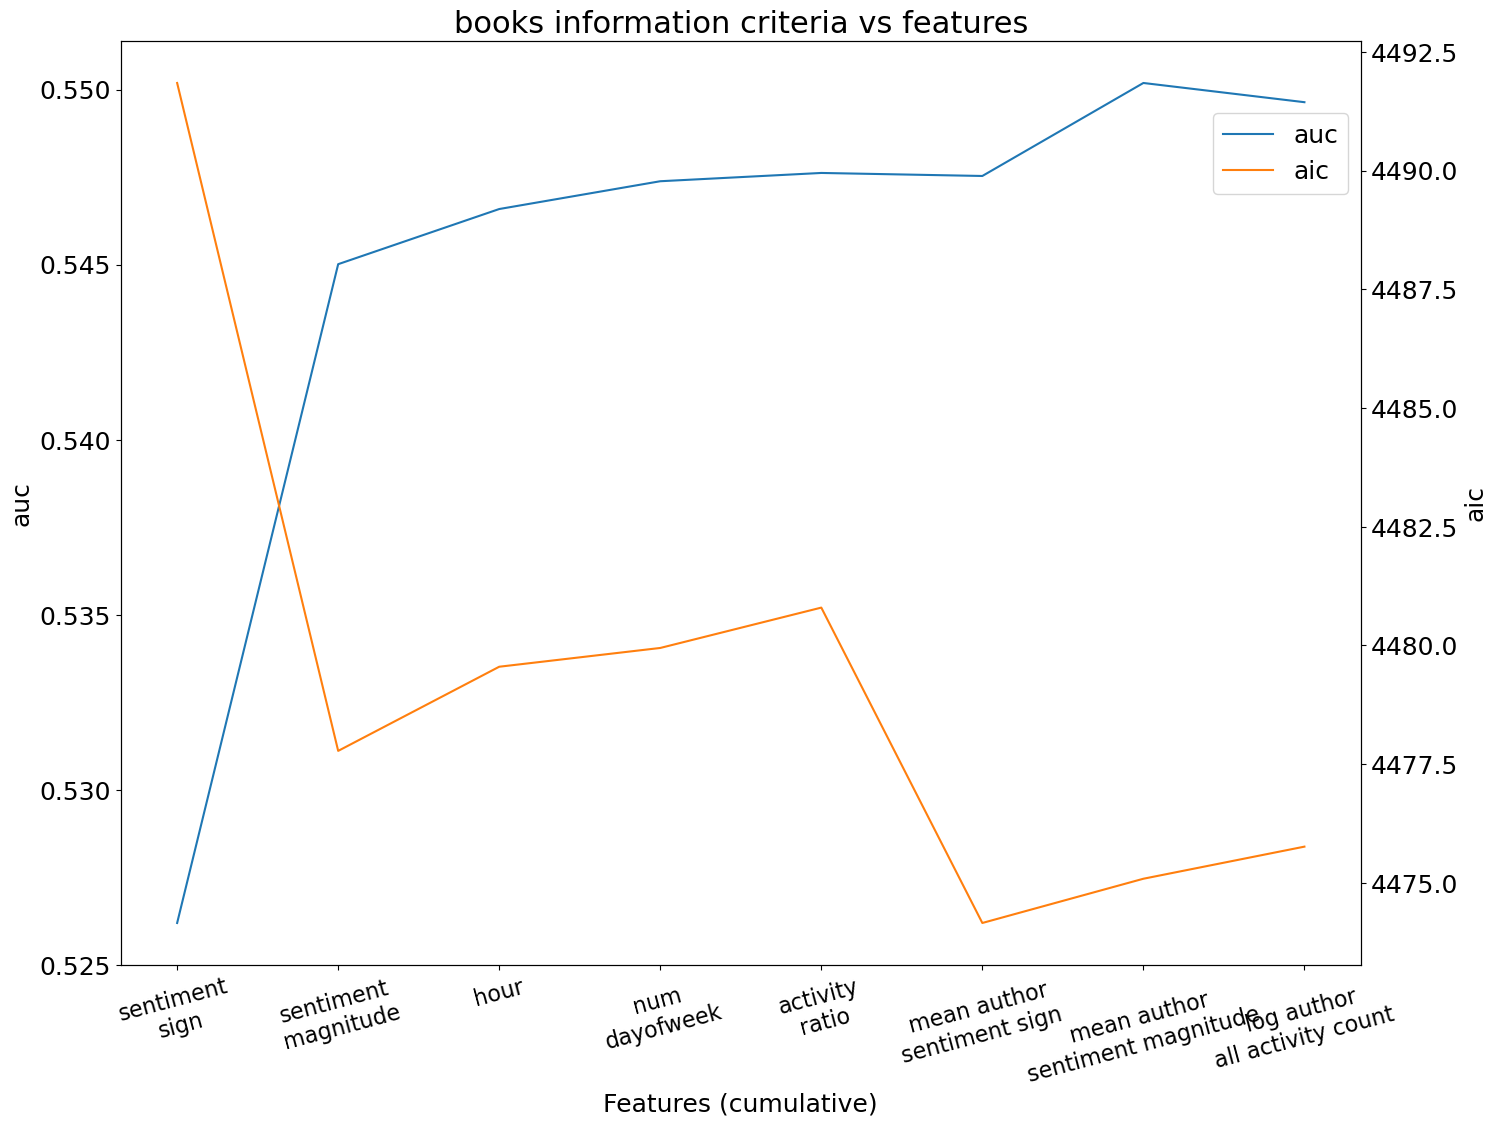

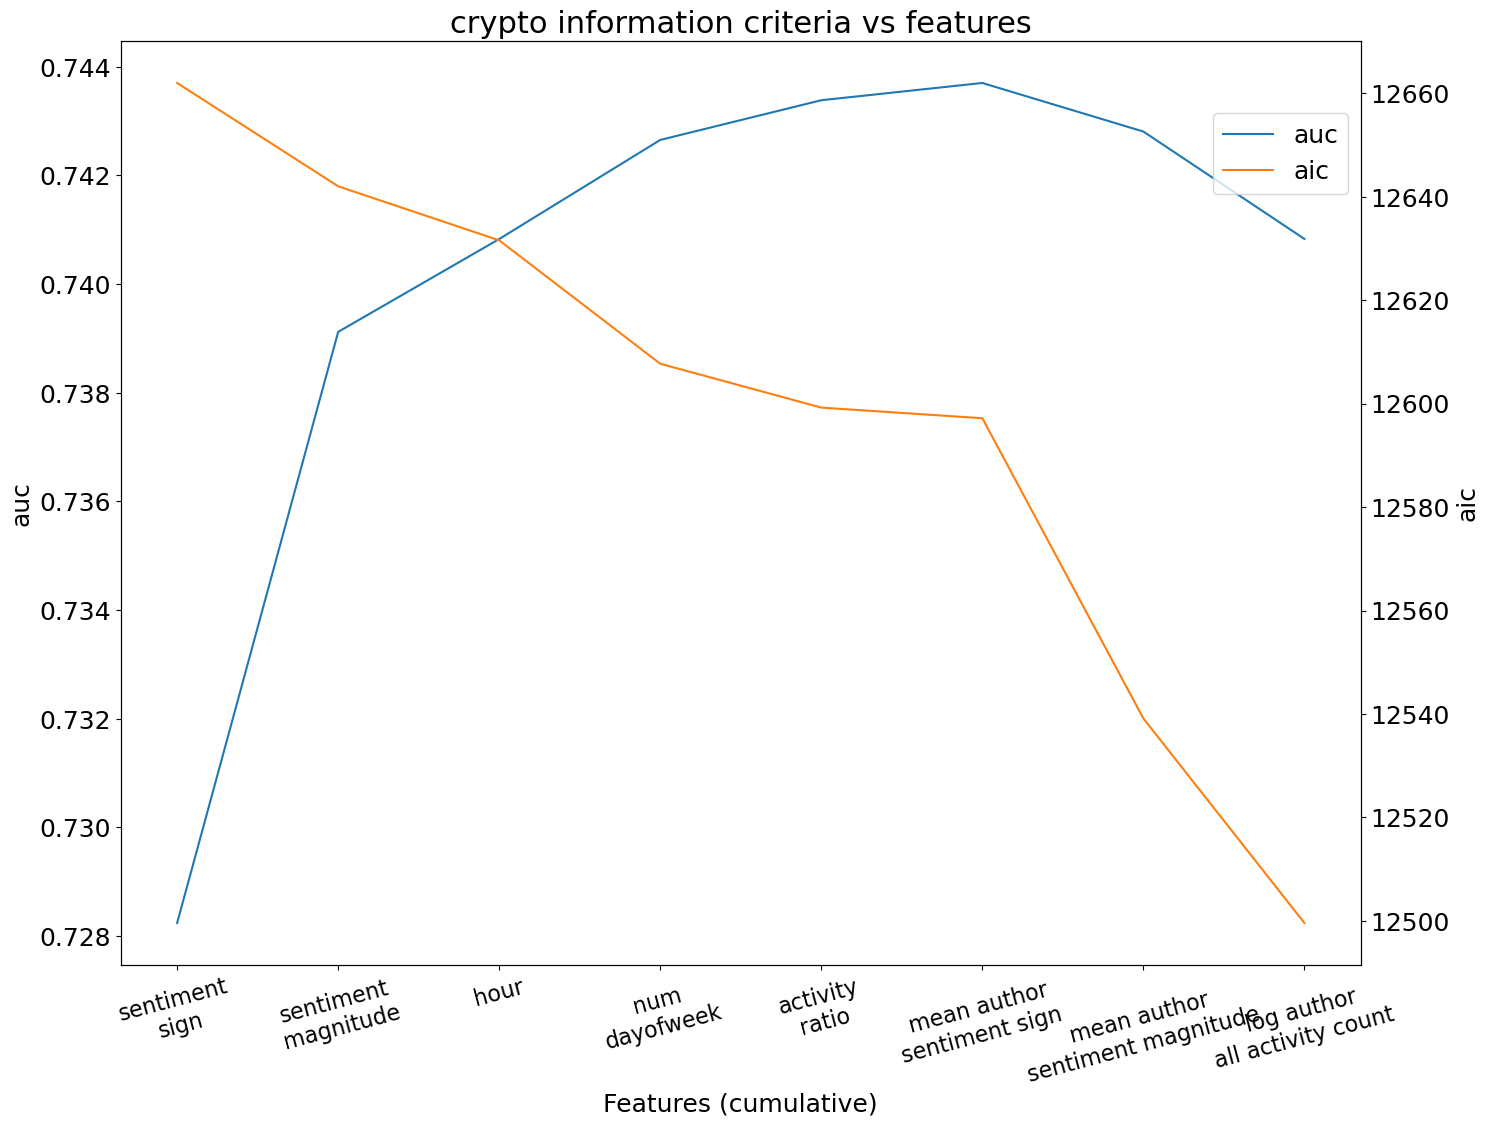

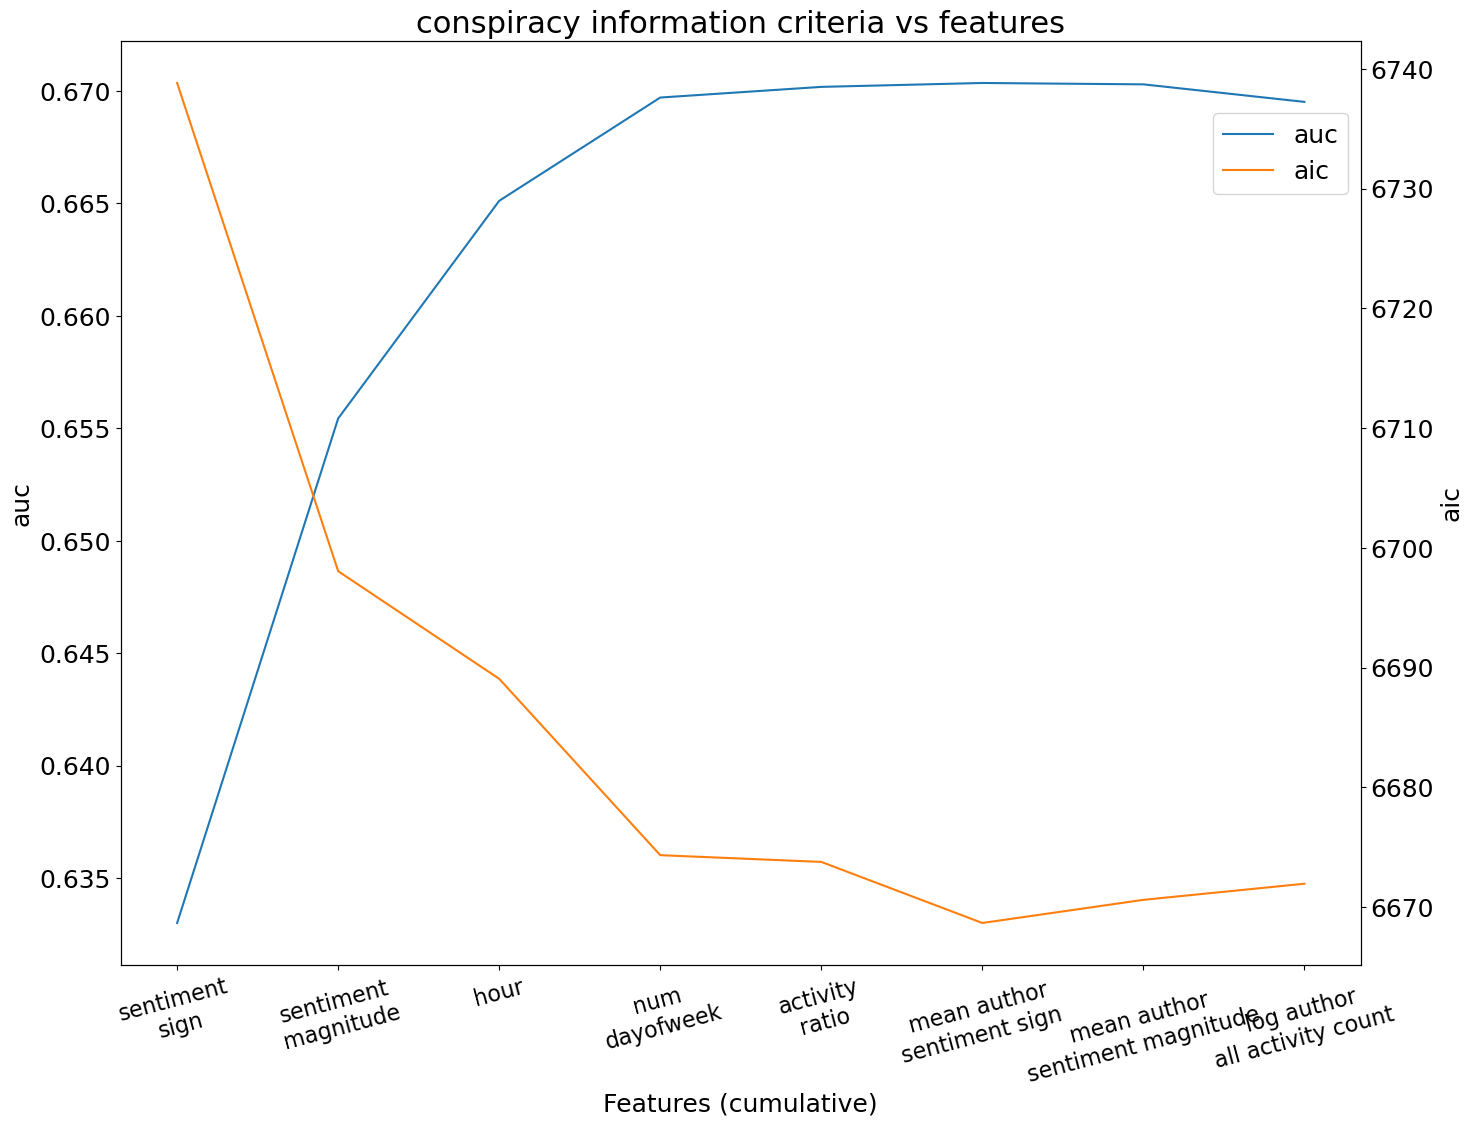

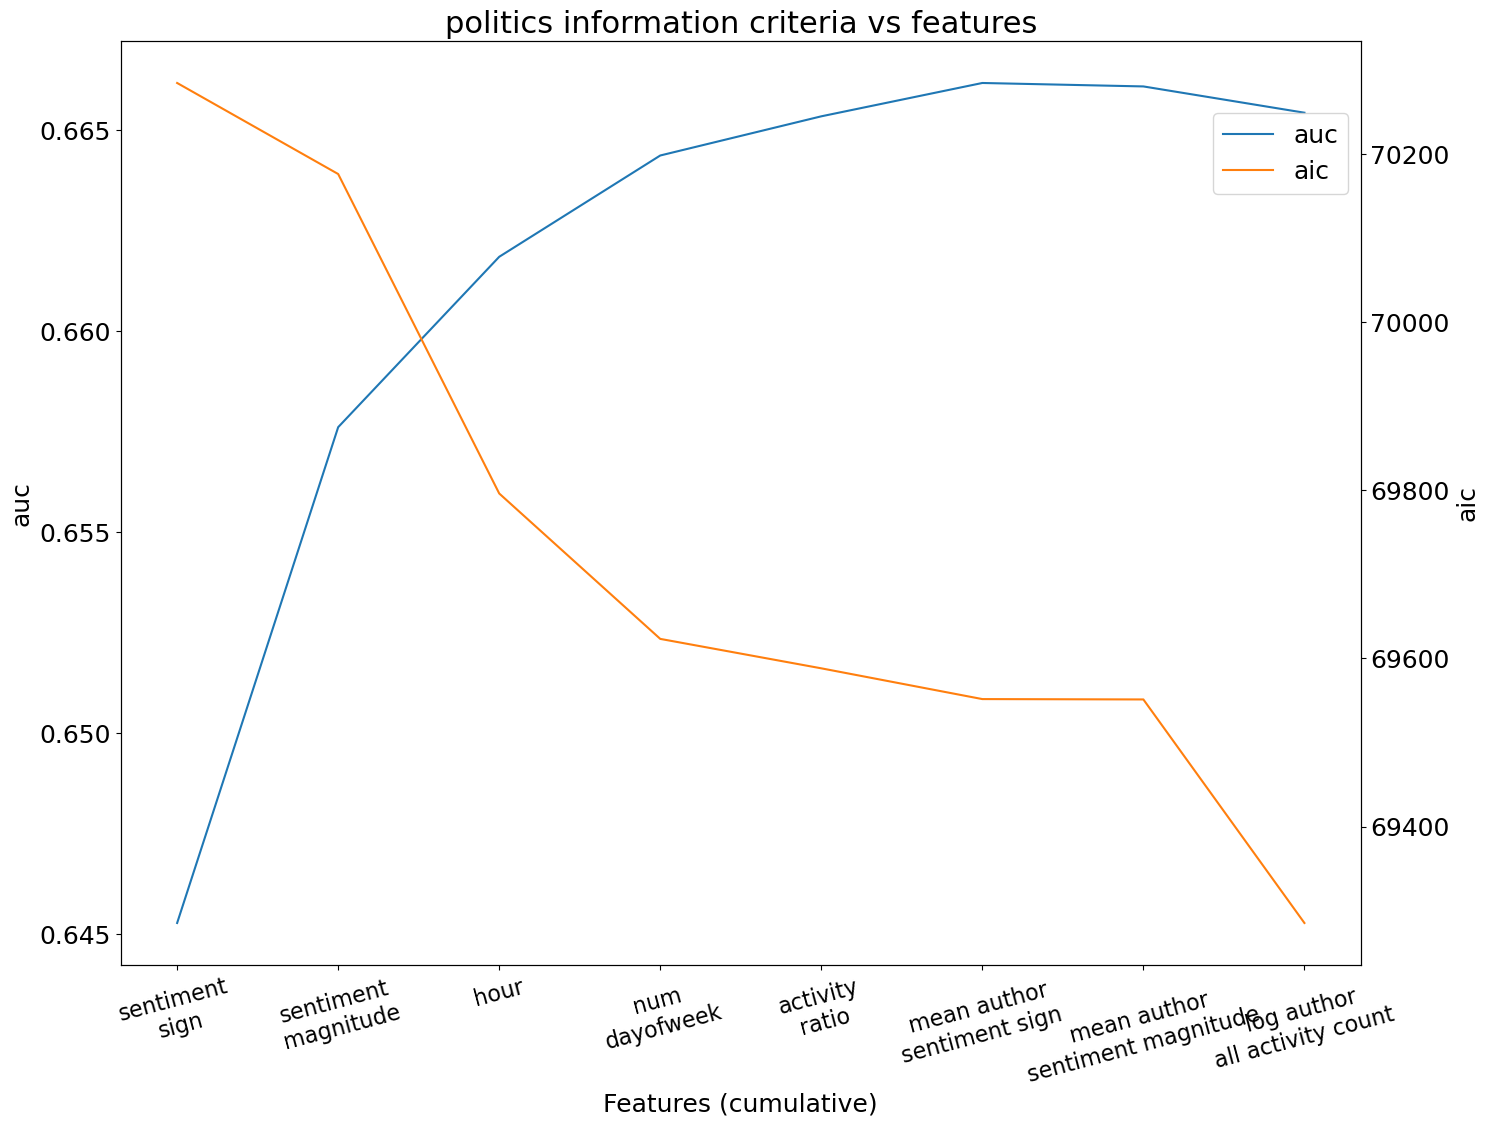

In [87]:
for subreddit in subreddit_logregs:
    plot_metrics_vs_features(
        subreddit_logregs[subreddit], ['auc', 'aic'],
        name=f"{subreddit}", legend_loc=(0.9,0.83)
    )